In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
columns = df.columns
for column in columns:
    print(df[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    

school
GP    65.2%
MS    34.8%
Name: proportion, dtype: object
sex
F    59.0%
M    41.0%
Name: proportion, dtype: object
age
17    27.6%
16    27.3%
18    21.6%
15    17.3%
19     4.9%
20     0.9%
21     0.3%
22     0.2%
Name: proportion, dtype: object
address
U    69.6%
R    30.4%
Name: proportion, dtype: object
famsize
GT3    70.4%
LE3    29.6%
Name: proportion, dtype: object
Pstatus
T    87.7%
A    12.3%
Name: proportion, dtype: object
Medu
2    28.7%
4    27.0%
1    22.0%
3    21.4%
0     0.9%
Name: proportion, dtype: object
Fedu
2    32.2%
1    26.8%
3    20.2%
4    19.7%
0     1.1%
Name: proportion, dtype: object
Mjob
other       39.8%
services    21.0%
at_home     20.8%
teacher     11.1%
health       7.4%
Name: proportion, dtype: object
Fjob
other       56.5%
services    27.9%
at_home      6.5%
teacher      5.5%
health       3.5%
Name: proportion, dtype: object
reason
course        43.9%
home          23.0%
reputation    22.0%
other         11.1%
Name: proportion, dtype: object


In [4]:
#create a new dataframe with first set of deleted columns, which are address, Mjob, Fjob, nursery, G1 and G2
df_new = df[['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
df_new

,school,sex,age,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,GT3,A,4,4,course,mother,2,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,GT3,T,1,1,course,father,1,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,LE3,T,1,1,other,mother,1,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,GT3,T,4,2,home,mother,1,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,GT3,T,3,3,home,father,1,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,GT3,T,2,3,course,mother,1,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,LE3,T,3,1,course,mother,1,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,GT3,T,1,1,course,mother,2,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,LE3,T,3,1,course,mother,2,...,yes,no,2,4,5,3,4,2,6,10


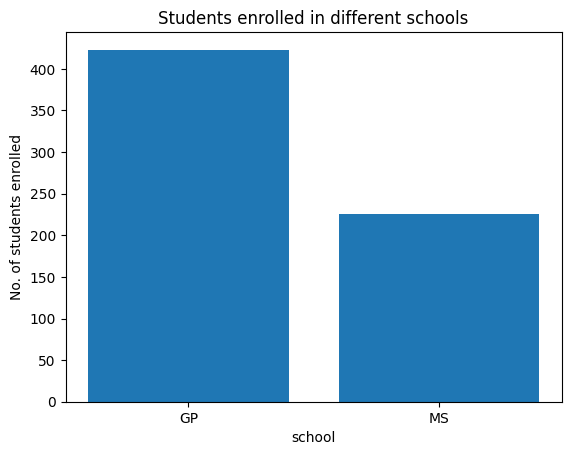

In [5]:
#breakdown by school
plt.bar(['GP', 'MS'],df_new['school'].value_counts())
plt.xlabel("school")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different schools")
plt.show()


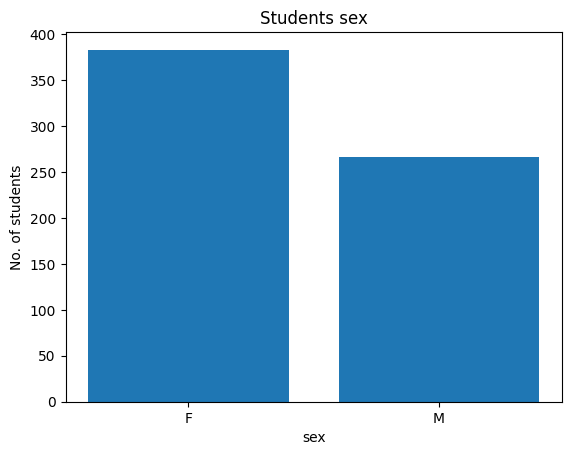

In [6]:
#breakdown by sex

plt.bar(['F', 'M'],df_new['sex'].value_counts())
plt.xlabel("sex")
plt.ylabel("No. of students")
plt.title("Students sex")
plt.show()


In [7]:
df_alcohol = df[['age', 'Dalc','Walc', 'health']]
df_alcohol

,age,Dalc,Walc,health
0,18,1,1,3
1,17,1,1,3
2,15,2,3,3
3,15,1,1,5
4,16,1,2,5
...,...,...,...,...
644,19,1,2,5
645,18,1,1,1
646,18,1,1,5
647,17,3,4,2


<Axes: >

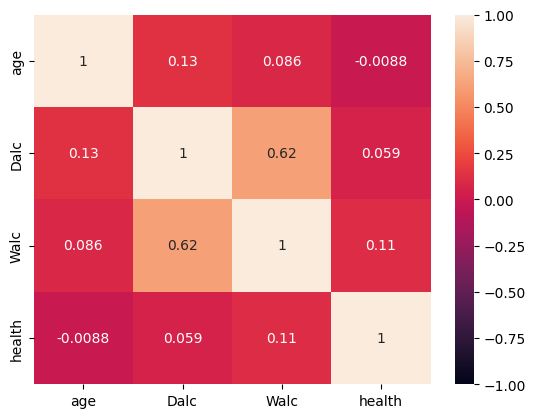

In [8]:
sns.heatmap(df_alcohol.corr(), vmin=-1, vmax=1, annot=True)

Text(0.5, 1.0, 'students age 20')

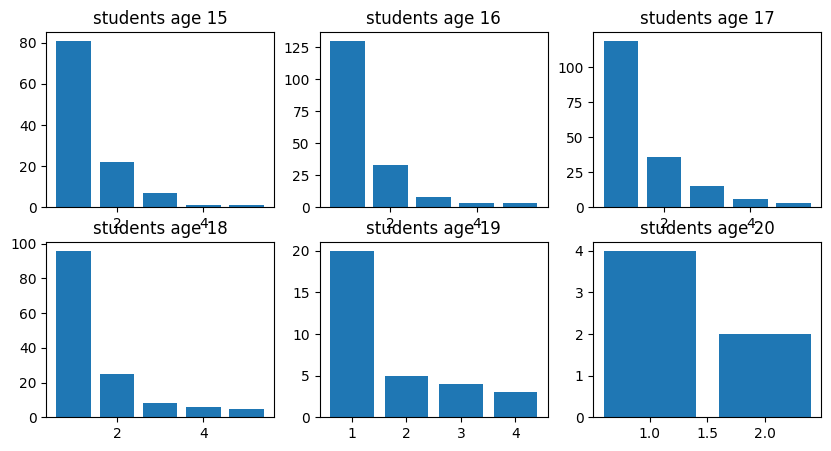

In [9]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(2, 3,1)
ax1.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==15]['Dalc'].value_counts(normalize=False))
ax2 = plt.subplot(2, 3,2)
ax2.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==16]['Dalc'].value_counts(normalize=False))
ax3 = plt.subplot(2, 3,3)
ax3.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==17]['Dalc'].value_counts(normalize=False))
ax4 = plt.subplot(2, 3,4)
ax4.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==18]['Dalc'].value_counts(normalize=False))
ax5 = plt.subplot(2, 3,5)
ax5.bar([1,2,3,4], df_alcohol[df_alcohol['age']==19]['Dalc'].value_counts())
ax6 = plt.subplot(2, 3,6)
ax6.bar([1,2], df_alcohol[df_alcohol['age']==20]['Dalc'].value_counts())

ax1.set_title('students age 15')
ax2.set_title('students age 16')
ax3.set_title('students age 17')
ax4.set_title('students age 18')
ax5.set_title('students age 19')
ax6.set_title('students age 20')

<Axes: ylabel='Count'>

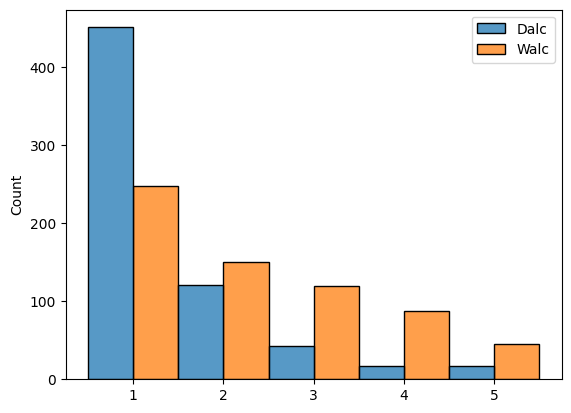

In [10]:
sns.histplot(data=df_alcohol[['Dalc', 'Walc']], multiple='dodge', discrete=1 )

In [11]:
df_alcohol_counted = df_alcohol[['Dalc', 'Walc', 'age']].value_counts().reset_index().sort_values('Dalc')
df_alcohol_counted

,Dalc,Walc,age,count
0,1,1,16,68
28,1,4,17,6
66,1,1,21,1
65,1,2,20,1
49,1,4,19,2
...,...,...,...,...
61,5,2,21,1
38,5,5,16,3
32,5,5,18,4
27,5,5,17,6


In [12]:
#number of students drinking during the week and at weekends by age
df_alcohol_counted['bins'] = pd.cut(df_alcohol_counted['age'], bins=[14, 17, 22])
df_alcohol_counted = df_alcohol_counted.drop(columns='age').value_counts().reset_index().sort_values(['Dalc', 'bins'])
df_alcohol_counted

#conclusion: delete both alcohol columns

ValueError: cannot insert count, already exists

<Axes: xlabel='Dalc', ylabel='Walc'>

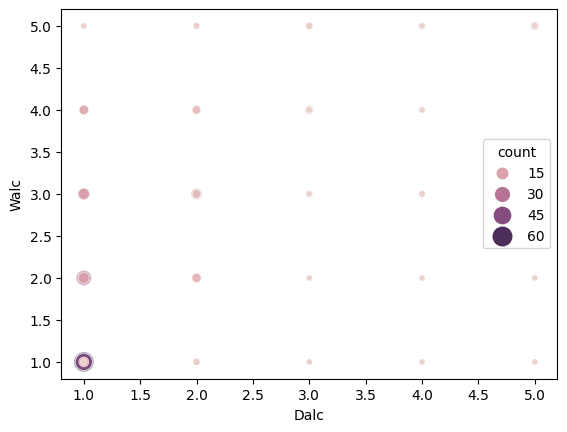

In [13]:
sns.scatterplot(data=df_alcohol_counted, x='Dalc', y='Walc', size='count', sizes=(20,200), hue='count')

In [14]:
#Combine failues 

df_new.failures.value_counts()
df_new[df_new['failures'] > 0] = 1
df_new['failures'].value_counts()

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/274008113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[df_new['failures'] > 0] = 1


failures
0    549
1    100
Name: count, dtype: int64

<Axes: >

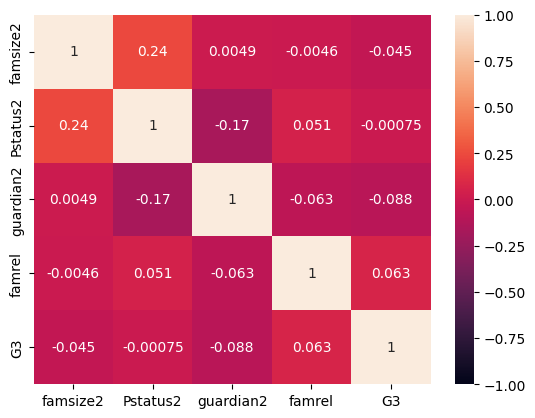

In [15]:
df_family = df[['famsize', 'Pstatus', 'guardian', 'famrel', 'G3']]
df['famsize2'] = df['famsize'].replace({'GT3': 1, 'LE3': 0})
df['Pstatus2'] = df['Pstatus'].replace({'T': 1, 'A': 0})
df['guardian2'] = df['guardian'].replace({'mother': 1, 'father': 0, 'other': 3})
df_family2 = df[['famsize2', 'Pstatus2', 'guardian2','famrel', 'G3']]
sns.heatmap(df_family2.corr(), vmin=-1, vmax=1, annot=True)

#famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
#Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
#guardian - student's guardian (nominal: 'mother', 'father' or 'other')
#famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

In [16]:
df_family2
#df_family2.guardian2.value_counts(normalize=True)


,famsize2,Pstatus2,guardian2,famrel,G3
0,1,0,1,4,11
1,1,1,0,5,11
2,0,1,1,4,12
3,1,1,1,3,14
4,1,1,0,4,13
...,...,...,...,...,...
644,1,1,1,5,10
645,0,1,1,4,16
646,1,1,1,1,9
647,0,1,1,2,10


In [17]:
#conclusion: drop all columns as no evident relation to grade 
df_family2.famsize2.value_counts(normalize=True), df_family2.Pstatus2.value_counts(normalize=True), df_family2.guardian2.value_counts(normalize=True), df_family2.famrel.value_counts(normalize=True)

(famsize2
 1    0.70416
 0    0.29584
 Name: proportion, dtype: float64,
 Pstatus2
 1    0.876733
 0    0.123267
 Name: proportion, dtype: float64,
 guardian2
 1    0.701079
 0    0.235747
 3    0.063174
 Name: proportion, dtype: float64,
 famrel
 4    0.488444
 5    0.277350
 3    0.155624
 2    0.044684
 1    0.033898
 Name: proportion, dtype: float64)

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/1591947890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['activities2'] = df_time['activities'].replace({'yes': 1, 'no': 0})
/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/1591947890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['romantic2'] = df_time['romantic'].replace({'yes': 1, 'no': 0})


<Axes: >

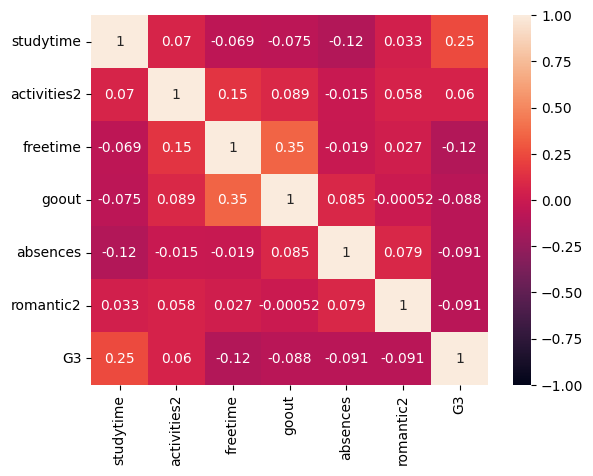

In [18]:
df_time = df[['studytime','activities', 'freetime', 'goout', 'absences', 'romantic', 'G3']]
#weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
df_time['activities2'] = df_time['activities'].replace({'yes': 1, 'no': 0})
df_time['romantic2'] = df_time['romantic'].replace({'yes': 1, 'no': 0})
df_time = df_time[['studytime', 'activities2', 'freetime', 'goout', 'absences', 'romantic2', 'G3']]
df_time
sns.heatmap(df_time.corr(), vmin=-1, vmax=1, annot=True)

#conclusion: delete all columns except study time and freetime

In [19]:
#School support 
df_support = df[['schoolsup', 'famsup', 'paid','higher','failures' ,'G3']]

#String to numeric
df_support['schoolsup2'] = df_support['schoolsup'].replace({'yes': 1, 'no': 0})
df_support['famsup2'] = df_support['famsup'].replace({'yes': 1, 'no': 0})
df_support['higher2'] = df_support['higher'].replace({'yes': 1, 'no': 0})
df_support['paid2'] = df_support['paid'].replace({'yes': 1, 'no': 0})

df_support = df_support[['schoolsup2','famsup2' ,'paid2','higher2','failures', 'G3']]

#Reassign failures to 0 or 1 
#df_support[df_support['failures'] > 0] = 1
df_support.loc[df_support['failures'] > 0, 'failures'] = 1

#schoolsup - extra educational support (binary: yes or no)
#famsup - family educational support (binary: yes or no)
#paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
#failures - number of past class failures (numeric: n if 1<=n<3, else 4)



/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/14893670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['schoolsup2'] = df_support['schoolsup'].replace({'yes': 1, 'no': 0})
/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/14893670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['famsup2'] = df_support['famsup'].replace({'yes': 1, 'no': 0})
/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/14893670.py:7: SettingWithCopyWarning: 
A va

In [20]:
df_support.schoolsup2.value_counts(normalize=True), df_support.famsup2.value_counts(normalize=True), df_support.paid2.value_counts(normalize=True),df_support.higher2.value_counts(normalize=True), df_support.failures.value_counts(normalize=True)

(schoolsup2
 0    0.895223
 1    0.104777
 Name: proportion, dtype: float64,
 famsup2
 1    0.613251
 0    0.386749
 Name: proportion, dtype: float64,
 paid2
 0    0.939908
 1    0.060092
 Name: proportion, dtype: float64,
 higher2
 1    0.893683
 0    0.106317
 Name: proportion, dtype: float64,
 failures
 0    0.845917
 1    0.154083
 Name: proportion, dtype: float64)

<Axes: >

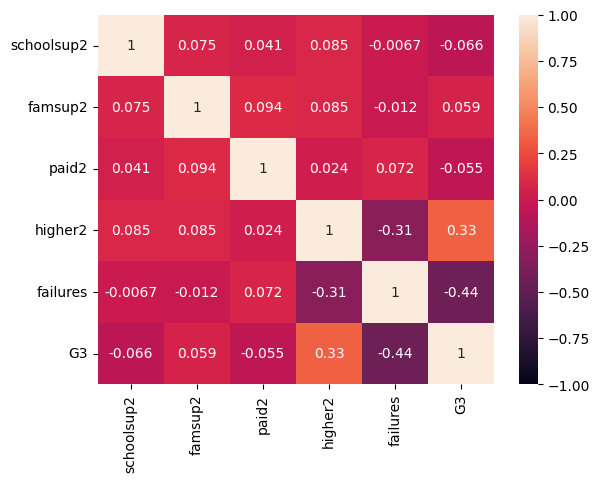

In [21]:
#Correlation heatmap
sns.heatmap(df_support.corr(), vmin=-1, vmax=1, annot=True)

#Conclusion - if a student has failed they likely have support, the biggest impact to G3 is failure so makes sense to only keep failure
#If a student want to pursue higher education that also has an impact on grades
#higher education nearly 95% student want to pursue so data is heavily skewed

In [ ]:
df_support.schoolsup2.value_counts(normalize=True), df_support.famsup2.value_counts(normalize=True), df_support.paid2.value_counts(normalize=True), df_support.failures.value_counts(normalize=True)

In [22]:
#Impact of reason to pick school
df_school = df[['school', 'age', 'Medu','reason', 'traveltime', 'failures','internet','G3']]


df_school['school2'] = df['school'].replace({'GP': 1, 'MS': 2})
df_school['reason2'] = df['reason'].replace({'course': 1, 'home': 2, 'other': 3, 'reputation': 4})
df_school['internet2'] = df['internet'].replace({'yes': 1, 'no': 0})

#Reduce traveltime to binary values: less than 15 mins or greater than 15mins
#df_school.loc[df_school['traveltime'] > 1, 'traveltime'] = 2
df_school['traveltime'] = df_school['traveltime'].apply(lambda x: 1 if x == 1 else 2)

#Reassign failures to 0 or 1 
df_school.loc[df_school['failures'] > 0, 'failures'] = 1

df_school = df_school[['school2', 'age', 'Medu','reason2', 'traveltime','failures','internet2','G3']]

df_school

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/927215043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school['school2'] = df['school'].replace({'GP': 1, 'MS': 2})
/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/927215043.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school['reason2'] = df['reason'].replace({'course': 1, 'home': 2, 'other': 3, 'reputation': 4})
/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/927215043.py:7: SettingWithCopyWa

,school2,age,Medu,reason2,traveltime,failures,internet2,G3
0,1,18,4,1,2,0,0,11
1,1,17,1,1,1,0,1,11
2,1,15,1,3,1,0,1,12
3,1,15,4,2,1,0,1,14
4,1,16,3,2,1,0,0,13
...,...,...,...,...,...,...,...,...
644,2,19,2,1,1,1,1,10
645,2,18,3,1,1,0,1,16
646,2,18,1,1,2,0,0,9
647,2,17,3,1,2,0,1,10


In [23]:
df_school.apply(pd.Series.value_counts, normalize=True)

#Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary
#reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

,school2,age,Medu,reason2,traveltime,failures,internet2,G3
0,NaN,NaN,0.009245,NaN,NaN,0.845917,0.232666,0.023112
1,0.651772,NaN,0.220339,0.439137,0.563945,0.154083,0.767334,0.001541
2,0.348228,NaN,0.286595,0.229584,0.436055,NaN,NaN,NaN
3,NaN,NaN,0.214176,0.110940,NaN,NaN,NaN,NaN
4,NaN,NaN,0.269646,0.220339,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001541
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004622
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015408
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053929
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053929


<Axes: >

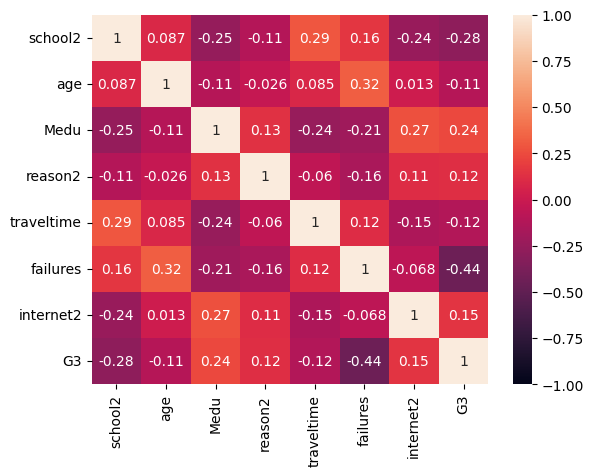

In [24]:
sns.heatmap(df_school.corr(), vmin=-1, vmax=1, annot=True)

#conclusion: choice of school has an impact on grades, reason for school, traveltime, internet

In [31]:
df_misc = df[['reason', 'traveltime', 'internet','G3']]
df_misc['reason2'] = df['reason'].replace({'course': 1, 'home': 2, 'other': 3, 'reputation': 4})
df_misc['internet2'] = df['internet'].replace({'yes': 1, 'no': 0})

#Reduce traveltime to binary values: less than 15 mins or greater than 15mins
#df_school.loc[df_school['traveltime'] > 1, 'traveltime'] = 2
df_misc['traveltime'] = df_misc['traveltime'].apply(lambda x: 1 if x == 1 else 2)
df_misc = df_misc[['reason2', 'traveltime', 'internet2','G3']]
df_misc

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/1382539754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_misc['reason2'] = df['reason'].replace({'course': 1, 'home': 2, 'other': 3, 'reputation': 4})
/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/1382539754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_misc['internet2'] = df['internet'].replace({'yes': 1, 'no': 0})
/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_4673/1382539754.py:7: SettingWithCo

,reason2,traveltime,internet2,G3
0,1,2,0,11
1,1,1,1,11
2,3,1,1,12
3,2,1,1,14
4,2,1,0,13
...,...,...,...,...
644,1,1,1,10
645,1,1,1,16
646,1,2,0,9
647,1,2,1,10


<bound method hist_series of 0      2
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    2
647    2
648    3
Name: traveltime, Length: 649, dtype: int64>

In [25]:
#Parents education
df_parents = df[['Medu', 'Fedu']]
df_parents_counted = df_parents.value_counts().reset_index()

df_parents_counted
#conclusion: only keep mother education

,Medu,Fedu,count
0,2,2,101
1,4,4,95
2,1,1,92
3,3,3,54
4,2,1,52
5,4,3,44
6,3,2,42
7,1,2,36
8,4,2,27
9,2,3,25


In [39]:
df_dropped = df[['sex', 'age', 'Medu', 'reason', 'traveltime', 'studytime', 'freetime', 'higher',
       'failures', 'internet', 'G3']]
df_dropped

,sex,age,Medu,reason,traveltime,studytime,freetime,higher,failures,internet,G3
0,F,18,4,course,2,2,3,yes,0,no,11
1,F,17,1,course,1,2,3,yes,0,yes,11
2,F,15,1,other,1,2,3,yes,0,yes,12
3,F,15,4,home,1,3,2,yes,0,yes,14
4,F,16,3,home,1,2,3,yes,0,no,13
...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,2,course,1,3,4,yes,1,yes,10
645,F,18,3,course,1,2,3,yes,0,yes,16
646,F,18,1,course,2,2,1,yes,0,no,9
647,M,17,3,course,2,1,4,yes,0,yes,10
